# STA 208: Homework 4 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. (6 pts) Suppose that the spectral decomposition of $K$ is $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?

1. (9 pts) Consider ridge regression with objective,
$$
\min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2.
$$
rewrite the above as an optimization over $\alpha \in \mathbb R^n$ using the kernel trick (this gives you kernel ridge regression).

1. (6 pts) Suppose that the kernel matrix has spectral decomposition $K = U \Lambda U^\top$.  Write the solution to the kernel ridge regression as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

1. (9 pts) Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".

1. We know that the Mercer kernel is positive semidefinite, so each element of $\Lambda$ is the eignvalue of $K$ and greater than 0. It is easy to check. Define $x_i = (0,...1_{(i)},...0)$, We know that $x_i^TKx_i=\lambda_i \geq 0$.

2. Taking derivatives, we may get
$$\sum(y_i-\phi(x_i)^T\beta)\phi(x_i)=2\lambda I\beta$$
$$\sum y_i\phi(x_i)-(\sum \phi(x_i)^T\phi(x_i)+2\lambda I)\beta =0 $$
so we can get the optimization
$$\beta = (\sum \phi(x_i)^T\phi(x_i)+2\lambda I)^{-1}\sum y_i\phi(x_i)$$
So, using the fact that $(PQ+I_N)^{-1}P = P(QP+I_M)^{-1}$, where $P_{nm}$ and $Q_{mn}$
$$\beta = \sum (\phi(X)\phi(X)^T+2\lambda I)^{-1}y_i \phi(x_i) = \sum_i\alpha_i\phi(x_i)$$
where $\alpha_i = (\phi(X)\phi(X)^T+2\lambda I)^{-1}y_i$.
Notice that $\phi(X)^T\beta = \phi(X)^T \sum_i\alpha_i\phi(x_i) = \alpha \phi(X)^T\phi(X) = \alpha K$, the regression turns to be
$$\min_{\alpha \in \ell_2} \frac 12 ( y - K \alpha)^\top ( y - K \alpha) + \lambda \alpha^\top K\alpha$$

3. $\alpha_i = (\phi(X)\phi(X)^T+2\lambda I)^{-1}y_i = (K + 2\lambda I)^{-1}y_i = (U\Lambda U^T + 2\lambda I)^{-1}y_i$.
Since $\Lambda$ is diagonal, 
$$\alpha_i = (U(\Lambda+2\lambda I) U^T)^{-1}y_i = U^{-T}(\Lambda+2\lambda I)^{-1} U^{-1}y_i = U^{-T}(diag(\frac{1}{\Lambda_j+2\lambda})) U^{-1}y_i$$
Increase one of the eigenvalues, $\Lambda_j$ increases, $\alpha_i$ decreases, so $\beta$ decreases.

4. Check if the following notions of similarity are Mercer kernels.

    A True. $K = X^TX$, where $X=[x_1,..,x_2]$ and $y^TKy = y^TX^TXy = ||Xy||^2\geq 0$ .

    B False. $y^T K y = y^T x_1x_1^T y - y^T x_2x_2^T y $. It is easy to construct that $y^TKy\leq 0$.

    C True. It is positive semidefinite.

__Exercise 2__ (30 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [52]:
dt = pd.read_csv('poses.csv')
dt_new = dt[['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','task']]
dt_new = dt_new.replace('bending1', 'bending')
dt_new = dt_new.replace('bending2', 'bending')

dt_lag = pd.DataFrame()
for i in range(len(dt_new)-1):
    try:
        if int(dt_new.iloc[i+1]['# Columns: time']) - int(dt_new.iloc[i]['# Columns: time']) == 250 and dt_new.iloc[i+1]['task'] == dt_new.iloc[i]['task']:
            lag_c = pd.DataFrame(dt_new.loc[i+1,['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]-dt_new.loc[i,['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]).T
            lag_c['task'] = [dt_new.iloc[i]['task']]
            dt_lag = pd.concat([dt_lag,lag_c])
    except:
        continue
dt_lag.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task
0,-0.25,0.43,10,-2.76,-6.75,0.61,sitting
0,-0.08,0.04,-12.17,3.64,0.25,1.35,sitting
0,-1.67,0.35,3.34,-4.5,5.75,-1.74,sitting
0,0.25,0.01,-0.42,-0.51,0.5,-0.66,sitting
0,0.25,-0.33,-0.5,0,-1.5,0.4,sitting


In [53]:
X = preprocessing.scale(dt_lag[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X)          
pc12 = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([pc12, dt_lag[['task']].reset_index(drop=True)], axis = 1)
#plt.scatter(pc12['principal component 1'],pc12['principal component 2'])

In [56]:
task = list(set(finalDf['task'].tolist()))

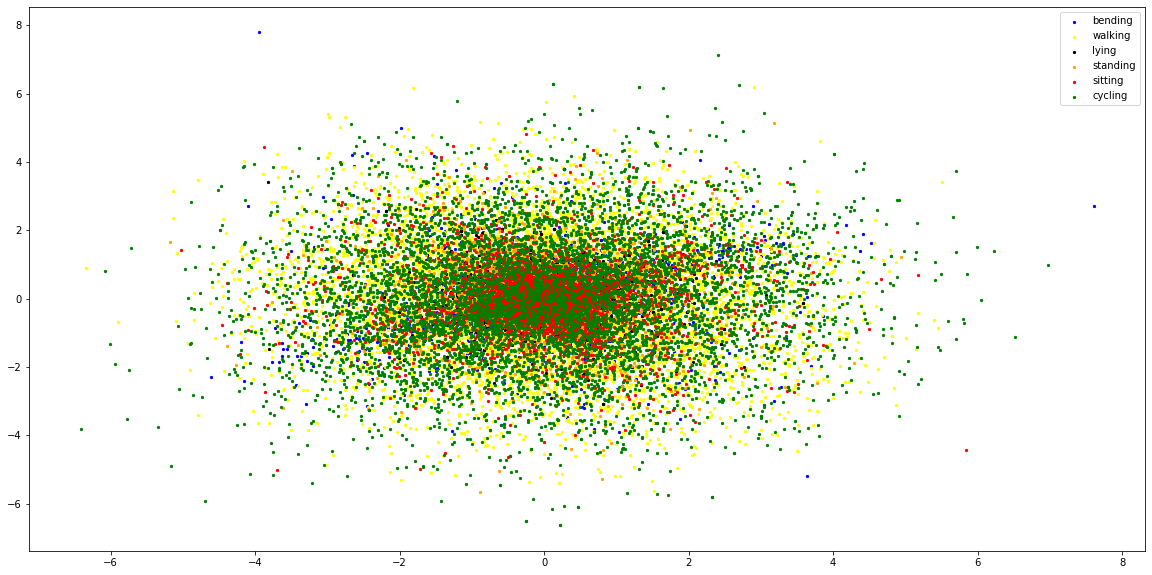

In [59]:
plt.figure(figsize=(20,10))
color = ['blue','yellow','black','orange','red','green']
for i in range(6):
    df_com = finalDf[finalDf['task'] == task[i]]
    plt.scatter(df_com['principal component 1'],df_com['principal component 2'],color = color[i],label=task[i],s=10)
plt.legend()

In [60]:
np.abs(pca.components_[0])

array([0.13647125, 0.23670262, 0.60705697, 0.60092678, 0.32257834,
       0.30275324])

In [61]:
np.abs(pca.components_[1])

array([0.09160474, 0.09119165, 0.32240112, 0.31038235, 0.62805141,
       0.62334933])

We can see the most important feature on the first component is 'avg_rss13' and on the second component is 'avg_rss23'.

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [66]:
X2 = dt_lag[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [67]:
y_kmeans = kmeans.predict(X)

In [68]:
for i in range(6):
    number = y_kmeans.tolist().count(i)
    print('the number of label '+str(i)+ ' is '+str(number))

the number of label 0 is 3375
the number of label 1 is 3502
the number of label 2 is 3076
the number of label 3 is 26190
the number of label 4 is 3149
the number of label 5 is 2379


In [77]:
label = ['bending','walking','lying','standing','sitting','cycling']
correct_rate = 0
for a in range(6):
    dt_lag_0 = dt_lag.replace(label[a],0)
    label_0 = list(set(label)-set(label[a]))
    for b in range(5):
        dt_lag_1 = dt_lag_0.replace(label_0[b],1)
        label_1 = list(set(label_0)-set(label_0[b]))
        for c in range(4):
            dt_lag_2 = dt_lag_1.replace(label_1[c],2)
            label_2 = list(set(label_1)-set(label_1[c]))
            for d in range(3):
                dt_lag_3 = dt_lag_2.replace(label_2[d],3)
                label_3 = list(set(label_2)-set(label_2[d]))
                for e in range(2):
                    dt_lag_4 = dt_lag_3.replace(label_3[e],4)
                    label_4 = list(set(label_3)-set(label_3[c]))
                    dt_lag_5 = dt_lag_4.replace(label_4[0],5)
                    if (dt_lag_5['task'] == y_kmeans).mean() > correct_rate:
                            correct_rate = (dt_lag_5['task'] == y_kmeans).mean()
                            print(str(a)+str(b)+str(c)+str(d)+str(e)+'  the correct rate is: '+str(correct_rate))
                                   

00000  the correct rate is: 0.007319238799164887
00001  the correct rate is: 0.03590026637229728
00010  the correct rate is: 0.03779606920880228
00020  the correct rate is: 0.16841448489357108
00021  the correct rate is: 0.19699551246670347
00120  the correct rate is: 0.1988193227904298
00321  the correct rate is: 0.20237095342084424
03120  the correct rate is: 0.20414676873605145
04021  the correct rate is: 0.2046747138297617
04120  the correct rate is: 0.20649852415348804
04321  the correct rate is: 0.2100501547839025
40321  the correct rate is: 0.21060209738187227
50021  the correct rate is: 0.2272803628422644
50120  the correct rate is: 0.22910417316599074
50321  the correct rate is: 0.2326558037964052
54321  the correct rate is: 0.23349571644548966


In [78]:
dt_lag_final = dt_lag.replace(label[5],0).replace(label[4],1).replace(label[3],2).replace(label[2],3).replace(label[1],4).replace(label[0],5)

In [79]:
confusion_matrix(dt_lag_final.task, y_kmeans)

array([[1251, 1392, 1092, 1144, 1203, 1103],
       [ 332,  320,  268, 5979,  278,    6],
       [ 246,  222,  224, 6238,  242,   13],
       [ 121,  133,  101, 6713,  109,    8],
       [1120, 1119, 1267, 1270, 1191, 1218],
       [ 305,  316,  124, 4846,  126,   31]], dtype=int64)

We can see the performance is not so good.

__Exercise 3__ (30 pts)

To introduce a simple neural network and learn some tensorflow we will use the following simulated dataset.  Throughout feel free to use the keras API, optimizers, etc.  You should only need to train this using the CPU.

In [6]:
import numpy as np
import pandas as pd
import plotnine as p9

In [51]:
n = 10000
X = np.random.uniform(0,1,(n,2))
p = 1 / (1 + np.exp(-5*(X.sum(axis=1) - 2.* (X[:,0] * X[:,1] > .25) - .5)))
y0 = np.random.uniform(0,1,n) < p

In [52]:
XOR_data = pd.DataFrame(X,columns=['X0','X1'])
XOR_data['p'] = p

C:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


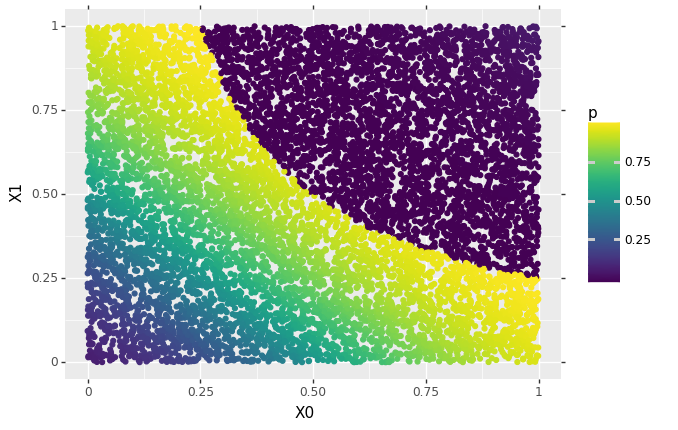

<ggplot: (-9223371859975317500)>

In [53]:
p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

Create a neural net with dense hidden layers (including intercepts for each hidden unit) and logistic loss function.  Train it on the above dataset with 2 dimensional input using Adam and 32 minibatch size.  You may want to increase the number of iterations until you see convergence.  You can assess visually by plotting the predictions and comparing to the true probability.

1. (10 pts) Try ReLu activation as well as sigmoid activation for 1 hidden layer and 3 units.
2. (10 pts) Try ReLu activation with 2 hidden layers and 3 units each.
3. (10 pts) Try (2) but with any combination of ReLu and Sigmoid activation.

In [2]:
import tensorflow as tf

In [55]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X,y0))
train_dataset = train_dataset.batch(batch_size)

In [62]:
train_dataset = train_dataset.shuffle(10000)

In [63]:
# ReLu activation 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(2)
])

In [64]:
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss(model, x, y, training):
    logits = model(x, training=training)
    return logistic_loss(y,logits)

In [65]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [8]:
optimizer = tf.keras.optimizers.Adam()

In [67]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
        epoch_accuracy.update_state(y, model(x, training=True))

        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),epoch_accuracy.result()))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 0.703, Accuracy: 50.150%
Epoch 050: Loss: 0.467, Accuracy: 75.790%
Epoch 100: Loss: 0.467, Accuracy: 75.740%
Epoch 150: Loss: 0.467, Accuracy: 75.800%
Epoch 200: Loss: 0.467, Accuracy: 75.810%


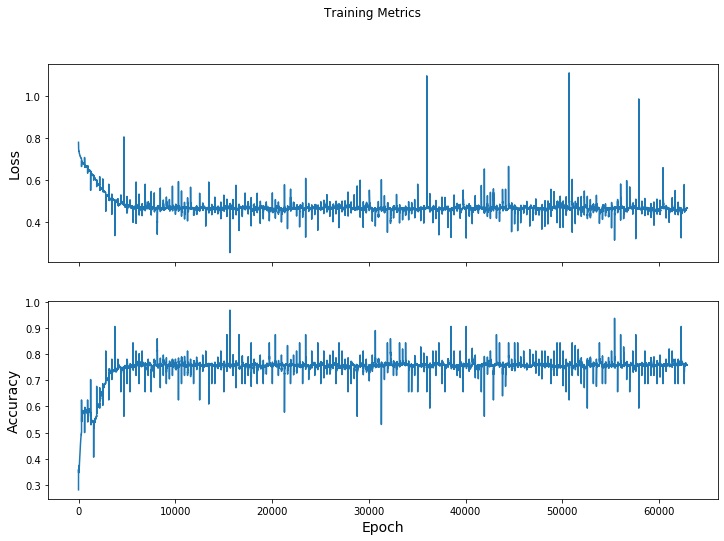

In [68]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

C:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


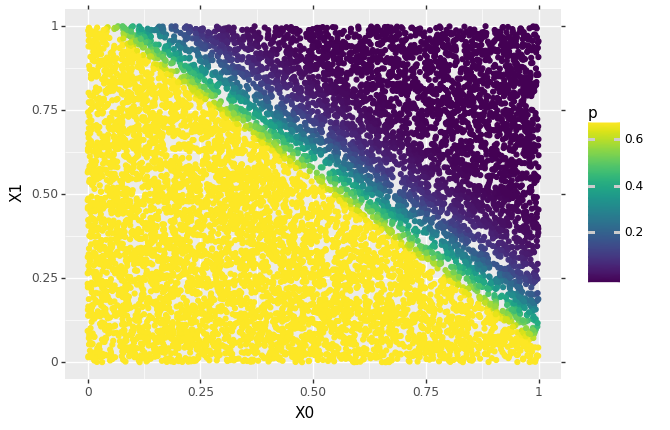

<ggplot: (-9223371859975366894)>

In [69]:
def x_with_ppreds(X,model):
    x_df = pd.DataFrame(X.numpy())
    p_preds = tf.nn.softmax(model(X)).numpy()[:,1]
    x_df['p_pred'] = p_preds
    return x_df

pred_df = pd.concat(x_with_ppreds(X,model) for X,y in train_dataset)
pred_df.columns = ['X0', 'X1', 'p']
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

In [85]:
# sigmoid activation 
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="sigmoid"),
    tf.keras.layers.Dense(2)
])

In [92]:
#define it as a function
def training(model,n):
    train_loss_results = []
    train_accuracy_results = []

    num_epochs = n

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

        for x, y in train_dataset:
            loss_value, grads = grad(model, x, y)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            epoch_loss_avg.update_state(loss_value)  # Add current batch loss
            epoch_accuracy.update_state(y, model(x, training=True))

              # End epoch
            train_loss_results.append(epoch_loss_avg.result())
            train_accuracy_results.append(epoch_accuracy.result())

        if epoch % ((n-1)/4) == 0:
            print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),epoch_accuracy.result()))
    return train_loss_results,train_accuracy_results


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 0.686, Accuracy: 58.360%
Epoch 100: Loss: 0.472, Accuracy: 77.810%
Epoch 200: Loss: 0.407, Accuracy: 80.830%
Epoch 300: Loss: 0.403, Accuracy: 80.830%


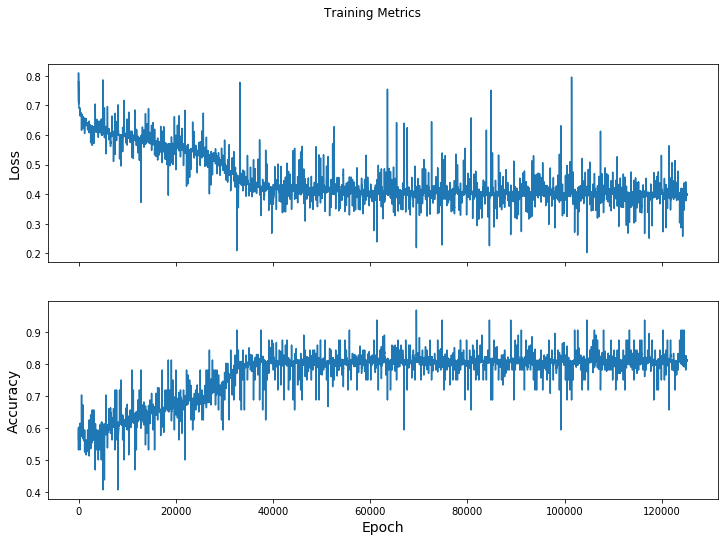

In [87]:
train_loss_results,train_accuracy_results = training(model2,400)
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

C:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


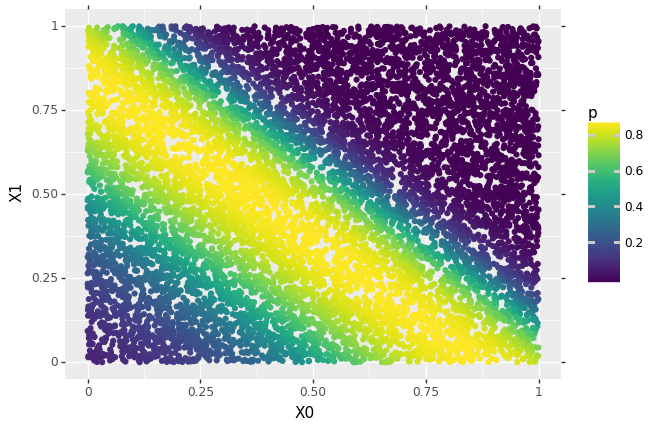

<ggplot: (-9223371859975921990)>

In [88]:
pred_df = pd.concat(x_with_ppreds(X,model2) for X,y in train_dataset)
pred_df.columns = ['X0', 'X1', 'p']
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

In [89]:
#ReLu activation with 2 hidden layers and 3 units each.
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(2),
])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 0.613, Accuracy: 59.950%


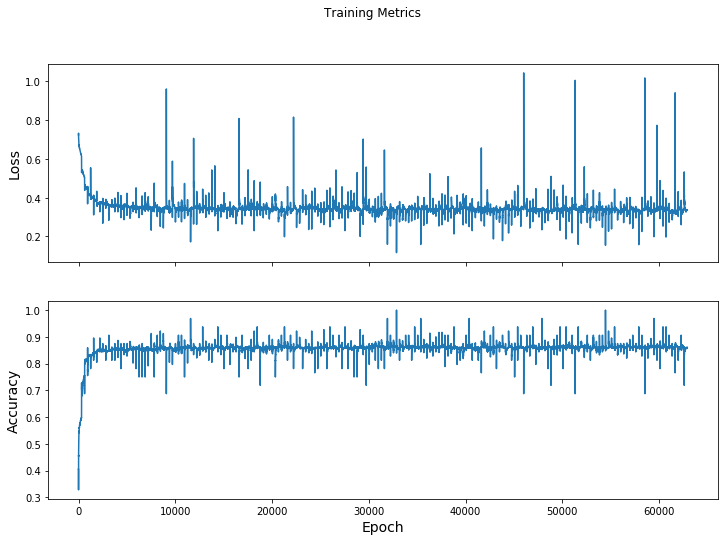

In [90]:
train_loss_results,train_accuracy_results = training(model3,201)

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

C:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


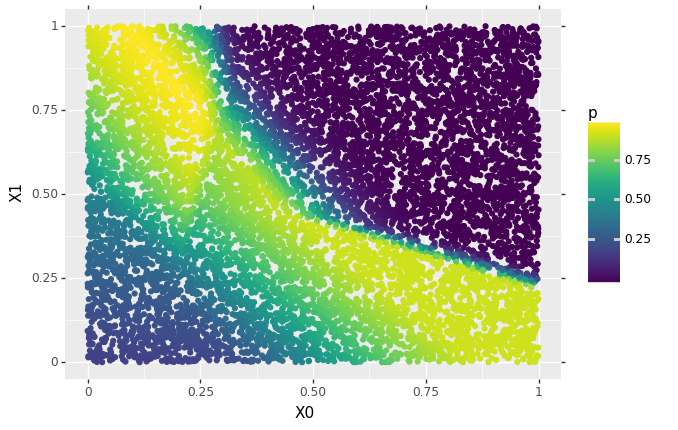

<ggplot: (176896603663)>

In [91]:
pred_df = pd.concat(x_with_ppreds(X,model3) for X,y in train_dataset)
pred_df.columns = ['X0', 'X1', 'p']
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 0.673, Accuracy: 58.360%
Epoch 050: Loss: 0.446, Accuracy: 78.570%
Epoch 100: Loss: 0.408, Accuracy: 80.380%
Epoch 150: Loss: 0.400, Accuracy: 80.720%
Epoch 200: Loss: 0.398, Accuracy: 80.780%


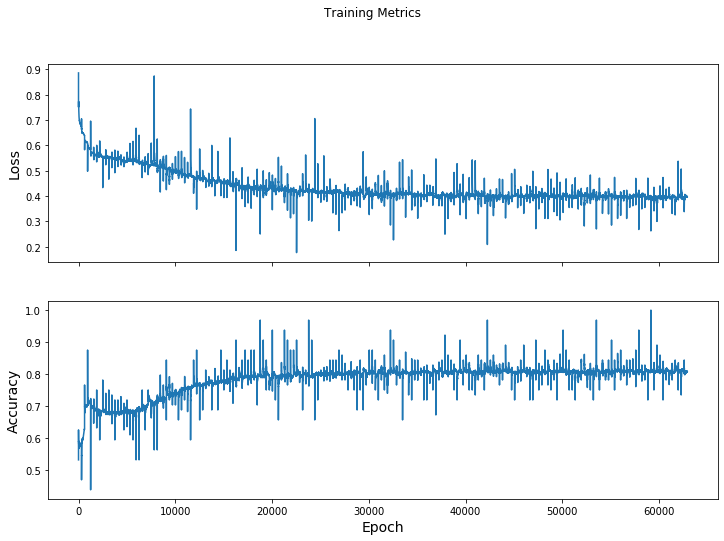

In [93]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="sigmoid"),
    tf.keras.layers.Dense(2),  
])
train_loss_results,train_accuracy_results = training(model4,201)
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

C:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


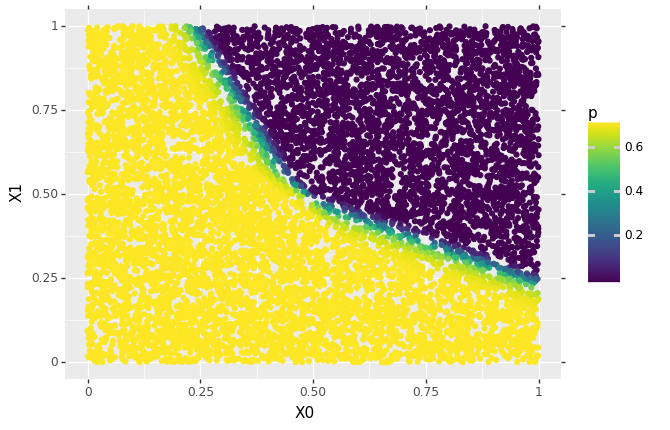

<ggplot: (176872968354)>

In [94]:
pred_df = pd.concat(x_with_ppreds(X,model4) for X,y in train_dataset)
pred_df.columns = ['X0', 'X1', 'p']
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

As we can see, model 3 has the best performance, which is ReLu activation with 2 hidden layers and 3 units each.

__Exercise 4__ (60 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Also, train a multilayer perceptron as in exercise 3, with multiple choices of depth, width, and activation functions.  Compare them using appropriate cross-validation.

In [3]:
data = pd.read_csv('housing.csv')

In [120]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
type_list = data.dtypes.tolist()
for i in range(81):
    if type_list[i] == 'O':
        data.iloc[:,i] = data.iloc[:,i].replace(np.nan, 'missing')
        data.iloc[:,i] = le.fit_transform(data.iloc[:,i])
    if type_list[i] == 'int64' or type_list[i] == 'float64':
        mean0 = data.iloc[:,0].sum()/data.iloc[:,0].notnull().sum()
        data.iloc[:,i].fillna(mean0, inplace = True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_tr, X_te, y_tr, y_te = train_test_split(X, y,random_state = 208)

scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [130]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {'n_estimators': [20*i for i in range(1,10)],
              'max_features': [2*i for i in range(1,4)],
              'max_depth': [10*i for i in range(2,5)]}
GCV = GridSearchCV(rfc, n_jobs = -1,cv = 5, param_grid = parameters).fit( X_tr, y_tr)        
GCV.best_params_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 30, 'max_features': 2, 'n_estimators': 160}

In [135]:
rfc0 = RandomForestClassifier(max_depth = 30,max_features=2,n_estimators =160)
rfc0.fit(X_tr, y_tr)
pred = rfc0.predict(X_te)
MSE = mean_squared_error(pred, y_te)
print('MSE of RandomForest: ' + str(MSE))

MSE of RandomForest: 1288482996.961644


In [137]:
# XGBoost
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
parameters = {'n_estimators': [20*i for i in range(1,10)],
              'max_depth': [20*i for i in range(2,5)]}
GCV = GridSearchCV(xg_reg, n_jobs = -1,cv = 5, param_grid = parameters).fit( X_tr, y_tr)        
GCV.best_params_

{'max_depth': 40, 'n_estimators': 180}

In [138]:
xgb0 = xgb.XGBRegressor(n_estimators = 180, max_depth = 40).fit( X_tr, y_tr)        
pred = xgb0.predict(X_te)
MSE = mean_squared_error(pred, y_te)
print('MSE of XGBoost: ' + str(MSE))

MSE of XGBoost: 719071833.0683721


In [139]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
parameters = {'n_neighbors': [2*i for i in range(1,10)],
              'leaf_size': [10*i for i in range(1,5)]}
GCV = GridSearchCV(neigh, n_jobs = -1,cv = 5, param_grid = parameters).fit( X_tr, y_tr)        
GCV.best_params_

{'leaf_size': 10, 'n_neighbors': 12}

In [140]:
neigh0 = KNeighborsRegressor(n_neighbors =12,leaf_size =10).fit( X_tr, y_tr)  
pred = neigh0.predict(X_te)
MSE = mean_squared_error(pred, y_te)
print('MSE of knn: ' + str(MSE))

MSE of knn: 1157340594.1427512


In [148]:
# kernel SVM
from sklearn.svm import SVR
svr = SVR()
parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'C': [3*i for i in range(1,10)],
             'epsilon': [0.2*i for i in range(1,10)]}
GCV = GridSearchCV(svr, n_jobs = -1,cv = 5, param_grid = parameters).fit( X_tr, y_tr)        
GCV.best_params_

{'C': 27, 'epsilon': 1.8, 'kernel': 'linear'}

In [150]:
svr0 = SVR(C = 27, epsilon = 1.8 ,kernel = 'linear').fit( X_tr, y_tr) 
pred = svr0.predict(X_te)
MSE = mean_squared_error(pred, y_te)
print('MSE of kernel SVR : ' + str(MSE))

MSE of kernel SVR : 1110788373.8599322


In [156]:
# multilayer perceptron
from sklearn.neural_network import MLPRegressor
mlr = MLPRegressor(max_iter = 500)
parameters = {'hidden_layer_sizes': [(10),(20),(30),(10,10),(20,20),(30,30),(10,10,10),(20,20,20),(30,30,30),(40,40,40)],
              'activation': ('identity', 'logistic', 'tanh', 'relu')}
GCV = GridSearchCV(mlr, n_jobs = -1,cv = 5, param_grid = parameters).fit( X_tr, y_tr)        
GCV.best_params_

{'activation': 'identity', 'hidden_layer_sizes': (30, 30, 30)}

In [155]:
mlr0 = MLPRegressor(activation ='identity', hidden_layer_sizes = (30,30,30),max_iter = 500).fit( X_tr, y_tr)  
pred = mlr0.predict(X_te)
MSE = mean_squared_error(pred, y_te)
print('MSE of multilayer perceptron  : ' + str(MSE))

MSE of multilayer perceptron  : 1770429732.0229619


As we can see, XGBoost has the best performance.

(Try neural network on tf)

In [9]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_tr, y_tr))
train_dataset = train_dataset.batch(batch_size)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1),  
])
logistic_loss0 = tf.keras.losses.MeanSquaredError()
def loss0(model, x, y, training):
    logits = model(x, training=training)
    return logistic_loss0(y,logits)

def grad0(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss0(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

def training0(model,n):
    train_loss_results = []
    train_MSE_results = []

    num_epochs = n

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()

        for x, y in train_dataset:
            loss_value, grads = grad0(model, x, y)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            epoch_loss_avg.update_state(loss_value)  # Add current batch loss
            # End epoch
            train_loss_results.append(epoch_loss_avg.result())

        if epoch % ((n-1)/4) == 0:
            print("Epoch {:03d}: Loss: {:.3f}".format(epoch,epoch_loss_avg.result()))
    return train_loss_results
train_loss_results = training0(model5,201)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 40402542592.000
Epoch 050: Loss: 831842816.000
Epoch 100: Loss: 820918976.000
Epoch 150: Loss: 822258880.000
Epoch 200: Loss: 822627776.000


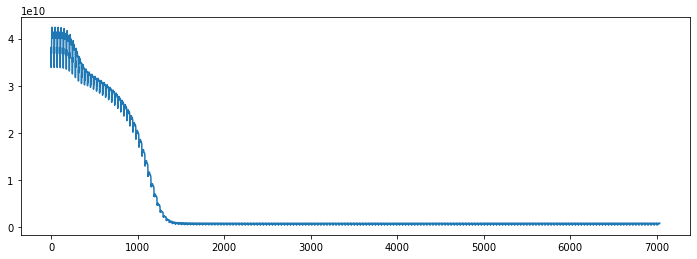

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train_loss_results)
plt.show()

On tensorflow, we get a better model with the same parameters.